# Black Holes: Key Quantitative Concepts

This notebook introduces three central ideas in black hole physics using simple equations and Python calculations. We assume familiarity with calculus and mechanics (Newton's laws, energy), and only a popular-science level of astronomy. All quantities are computed in SI units where appropriate, with masses often expressed in solar masses ($M_\odot$) for intuition.



#### Note: This notebook was created with the following prompt with the Cursor Agent:

> Create a pedagogical Jupyter notebook about black holes suitable for an introductory undergraduate astronomy course that emphasizes the calculation of specific quantites with python functions and figures based on matplotlib. Assume the students in the course are have taken a year of calculus and calculus-based physics, although do not assume more knowledge of astronomy than the level of popular science articles and books. The first key point to show with equations and figures are the Schwarzschild radius as a function of mass (in solar masses). This should be illustrated in comparison to the size of Solar System objects, especially for the stellar mass range and the supermassive range. Choose appropriate Solar System objects for each mass range (e.g. a known asteroid for the stellar mass range, orbital radius for the supermassive range). The second key point is the size of tidal forces in the vicinity of the event horizon for different black holes to illustrate the phenomenon of 'spaghettification.' This should include examples of where a few different types of objects (piece of spaghetti, a comet, and a star) would get ripped apart by gravitational tidal forces. This illustration should include disruption distance in units of the Schwarzschild radius. The third and last key point is gravitational redshift / time dilation. This should illustrate how time slows down near the event horizon relative to a distant observer for a range of black hole masses. The illustration of time dilation should extend from 10 to 1.01 times the Schwarzschild radius. Also print for comparison the time dilation at the surface of the Earth and the surface of the Sun for comparison. 

> Each key point should include a one or two paragraph description of the key concepts in markdown, including the use of latex for simple equations, and then one or more code cells with functions that implement the equations and matplotlib code that creates figures that illustrate the results. Figures should use at least 14 point font for tick marks and at least 16 point font for axis labels and titles. Each figure should span the full width of the window (no side-by-side figures) to make them readable. Chose the x- and y-axis range of each figure to correspond to what is shown, that is, do not leave lots of empty space. Use logarithms and scientific notation where appropriate for both printed quantities and axes.

## 1. The Schwarzschild Radius

A non-rotating, uncharged black hole is described by the **Schwarzschild solution**. The **event horizon** is a spherical surface at the **Schwarzschild radius** $R_s$, from which nothing can escape. In Newtonian terms, $R_s$ is the radius at which the escape speed equals the speed of light $c$. The exact general-relativistic result is

$$R_s = \frac{2GM}{c^2}.$$

For a mass $M$ in kilograms, $R_s$ is in meters. In solar masses ($M_\odot \approx 1.99\times 10^{30}$ kg), $R_s \approx 2.95\,\text{km} \times (M/M_\odot)$. So a $10\,M_\odot$ stellar-mass black hole has a horizon only about 30 km across—comparable to a large asteroid—while a supermassive black hole of $10^6\,M_\odot$ has $R_s \sim 3\times 10^6$ km, comparable to a few percent of Earth's orbital radius. Below we plot $R_s$ vs mass and compare to **Solar System objects chosen for each mass range**: asteroid and planet sizes for stellar-mass black holes, and orbital radii for supermassive black holes.


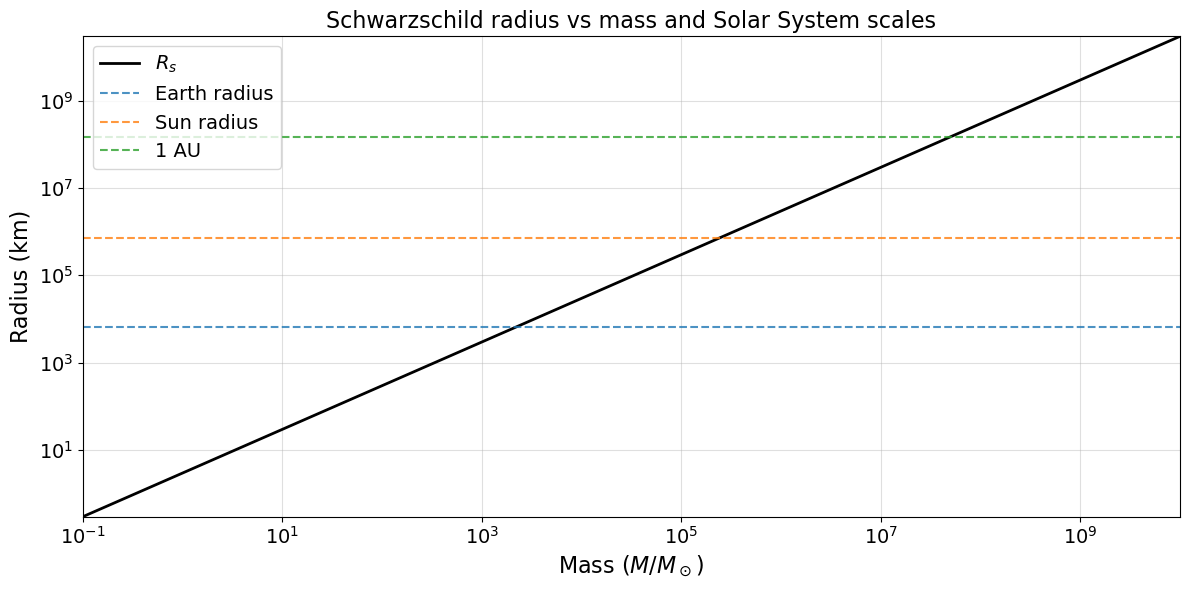

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.674e-11
c = 2.998e8
M_sun = 1.989e30

def schwarzschild_radius_meters(M_kg):
    """Schwarzschild radius R_s = 2 G M / c^2 (m)."""
    return 2 * G * M_kg / (c**2)

def schwarzschild_radius_solar_masses(M_solar):
    """R_s in meters for mass in solar masses."""
    return schwarzschild_radius_meters(M_solar * M_sun)

# Solar System reference sizes (m)
R_Earth = 6.371e6
R_Sun = 6.96e8
au_m = 1.496e11
R_Vesta = 262e3          # 4 Vesta mean radius (m) - large asteroid
R_Ceres = 470e3          # Ceres mean radius (m) - dwarf planet / asteroid
orbit_Jupiter_au = 5.2
orbit_Neptune_au = 30.1
orbit_Jupiter_m = orbit_Jupiter_au * au_m
orbit_Neptune_m = orbit_Neptune_au * au_m

M_solar = np.logspace(-1, 10, 200)
R_s = np.array([schwarzschild_radius_solar_masses(M) for M in M_solar])

fig, ax = plt.subplots(figsize=(12, 6))
ax.loglog(M_solar, R_s / 1e3, 'k-', lw=2, label=r'$R_s$')
ax.axhline(R_Earth / 1e3, color='C0', ls='--', alpha=0.8, label='Earth radius')
ax.axhline(R_Sun / 1e3, color='C1', ls='--', alpha=0.8, label='Sun radius')
ax.axhline(au_m / 1e3, color='C2', ls='--', alpha=0.8, label='1 AU')
ax.set_xlabel(r'Mass ($M/ M_\odot$)', fontsize=16)
ax.set_ylabel(r'Radius (km)', fontsize=16)
ax.set_title('Schwarzschild radius vs mass and Solar System scales', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(M_solar.min(), M_solar.max())
ax.set_ylim(R_s.min() / 1e3, max(R_s.max() / 1e3, au_m / 1e3 * 1.1))
ax.legend(loc='upper left', fontsize=14)
ax.grid(True, which='both', alpha=0.4)
plt.tight_layout()
plt.show()


NameError: name 'x' is not defined

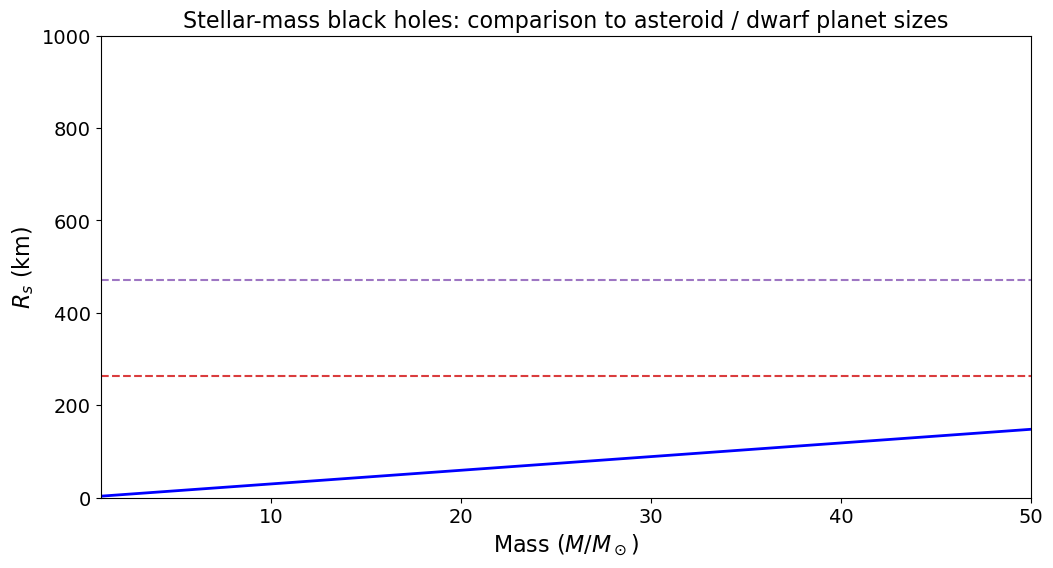

In [8]:
# Stellar-mass range: compare R_s to asteroid and planet sizes
fig, ax = plt.subplots(figsize=(12, 6))
M_stellar = np.linspace(1, 50, 100)
R_stellar = np.array([schwarzschild_radius_solar_masses(M) for M in M_stellar])
ax.plot(M_stellar, R_stellar / 1e3, 'b-', lw=2, label=r'$R_s$')
ax.axhline(R_Vesta / 1e3, color='C3', ls='--', alpha=0.9, label='4 Vesta radius (asteroid, ~262 km)')
ax.axhline(R_Ceres / 1e3, color='C4', ls='--', alpha=0.9, label='Ceres radius (dwarf planet, ~470 km)')
ax.axhline(R_Earth / 1e3, color='gray', ls=':', alpha=0.8, label='Earth radius')
ax.set_xlabel(r'Mass ($M/ M_\odot$)', fontsize=16)
ax.set_ylabel(r'$R_s$ (km)', fontsize=16)
ax.set_title('Stellar-mass black holes: comparison to asteroid / dwarf planet sizes', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(1, 50)
ymax = max(R_stellar.max() / 1e3, R_Earth / 1e3) * 1.05
#ax.set_ylim(0, ymax)
ax.set_ylim(0, 1000)
x.legend(loc='upper left', fontsize=14)
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


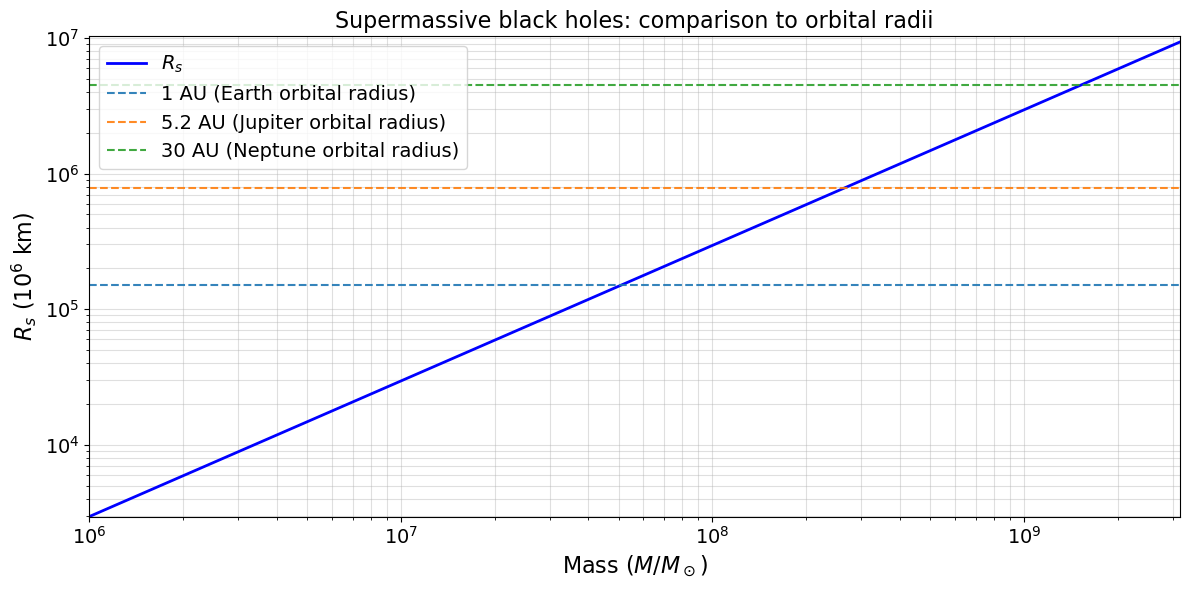

In [3]:
# Supermassive range: compare R_s to orbital radii
fig, ax = plt.subplots(figsize=(12, 6))
M_smbh = np.logspace(6, 9.5, 100)
R_smbh = np.array([schwarzschild_radius_solar_masses(M) for M in M_smbh])
ax.loglog(M_smbh, R_smbh / 1e6, 'b-', lw=2, label=r'$R_s$')
ax.axhline(au_m / 1e6, color='C0', ls='--', alpha=0.9, label='1 AU (Earth orbital radius)')
ax.axhline(orbit_Jupiter_m / 1e6, color='C1', ls='--', alpha=0.9, label=r'5.2 AU (Jupiter orbital radius)')
ax.axhline(orbit_Neptune_m / 1e6, color='C2', ls='--', alpha=0.9, label=r'30 AU (Neptune orbital radius)')
ax.set_xlabel(r'Mass ($M/ M_\odot$)', fontsize=16)
ax.set_ylabel(r'$R_s$ (10$^6$ km)', fontsize=16)
ax.set_title('Supermassive black holes: comparison to orbital radii', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(M_smbh.min(), M_smbh.max())
ymax = max(R_smbh.max() / 1e6, orbit_Neptune_m / 1e6) * 1.1
ax.set_ylim(R_smbh.min() / 1e6, ymax)
ax.legend(loc='upper left', fontsize=14)
ax.grid(True, which='both', alpha=0.4)
plt.tight_layout()
plt.show()


## 2. Tidal Forces and Spaghettification

**Tidal forces** arise because gravity pulls more strongly on the side of an object closer to the black hole than on the far side. The difference in acceleration across an object of length $L$ at distance $r$ from a mass $M$ is (in a Newtonian approximation)

$$a_{\text{tidal}} = \frac{2GM}{r^3}\,L.$$

So the tidal effect grows as $1/r^3$ and is proportional to $L$. For a given black hole mass, **smaller** black holes have a **smaller** $R_s$, so you can get much closer to the center before crossing the horizon—and tidal forces near $R_s$ are **larger** for smaller black holes. An object is torn apart when the tidal acceleration exceeds its own binding (e.g., tensile strength for a solid, or self-gravity for a comet or star). Below we compute where a piece of spaghetti, a comet, and a star would be disrupted, and show the **disruption distance in units of the Schwarzschild radius** $r/R_s$.


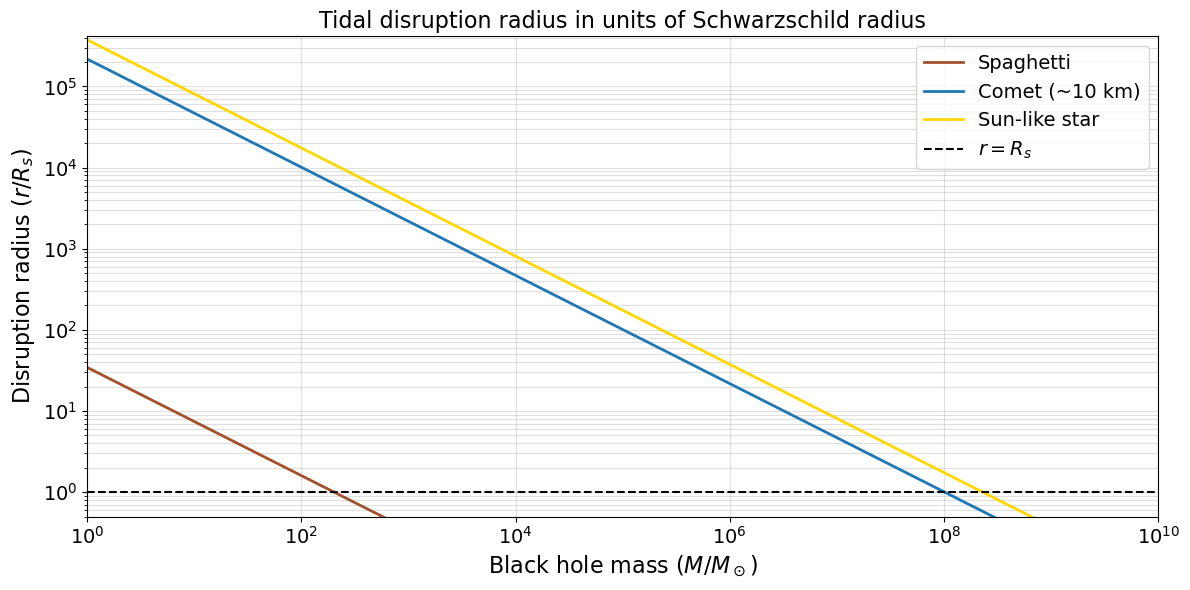

In [4]:
def tidal_acceleration(r, M_kg, L):
    return 2 * G * M_kg * L / (r**3)

a_spaghetti, L_spaghetti = 5e4, 0.2
a_comet, L_comet = 1e-2, 1e4
a_star, L_star = 270, 2 * 6.96e8

def r_disrupt(M_kg, L, a_bind):
    return (2 * G * M_kg * L / a_bind)**(1/3)

M_solar_arr = np.logspace(0, 10, 300)
R_s_arr = np.array([schwarzschild_radius_solar_masses(M) for M in M_solar_arr])
r_spag = np.array([r_disrupt(M * M_sun, L_spaghetti, a_spaghetti) for M in M_solar_arr])
r_comet = np.array([r_disrupt(M * M_sun, L_comet, a_comet) for M in M_solar_arr])
r_star = np.array([r_disrupt(M * M_sun, L_star, a_star) for M in M_solar_arr])

r_over_Rs_spag = r_spag / R_s_arr
r_over_Rs_comet = r_comet / R_s_arr
r_over_Rs_star = r_star / R_s_arr

fig, ax = plt.subplots(figsize=(12, 6))
ax.loglog(M_solar_arr, r_over_Rs_spag, color='sienna', lw=2, label='Spaghetti')
ax.loglog(M_solar_arr, r_over_Rs_comet, color='C0', lw=2, label='Comet (~10 km)')
ax.loglog(M_solar_arr, r_over_Rs_star, color='gold', lw=2, label='Sun-like star')
ax.axhline(1, color='k', ls='--', lw=1.5, label=r'$r = R_s$')
ax.set_xlabel(r'Black hole mass ($M/M_\odot$)', fontsize=16)
ax.set_ylabel(r'Disruption radius ($r / R_s$)', fontsize=16)
ax.set_title('Tidal disruption radius in units of Schwarzschild radius', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(M_solar_arr.min(), M_solar_arr.max())
y_min = min(r_over_Rs_spag.min(), r_over_Rs_comet.min(), r_over_Rs_star.min())
y_max = max(r_over_Rs_spag.max(), r_over_Rs_comet.max(), r_over_Rs_star.max())
ax.set_ylim(max(0.5, y_min * 0.9), y_max * 1.1)
ax.legend(loc='upper right', fontsize=14)
ax.grid(True, which='both', alpha=0.4)
plt.tight_layout()
plt.show()


## 3. Gravitational Redshift and Time Dilation

In general relativity, time runs at different rates at different distances from a massive body. For a Schwarzschild black hole, the **time dilation factor** between a clock at radius $r$ and a clock at infinity is

$$\frac{d\tau}{dt} = \sqrt{1 - \frac{R_s}{r}},$$

where $\tau$ is proper time (what a local observer measures) and $t$ is coordinate time (what a distant observer assigns). As $r \to R_s$, local time "freezes" relative to infinity. The same factor gives the **gravitational redshift** of light climbing out from $r$. Below we plot the time dilation factor from $r = 1.01\,R_s$ to $r = 10\,R_s$, and print the time dilation at the surface of the Earth and the Sun for comparison.


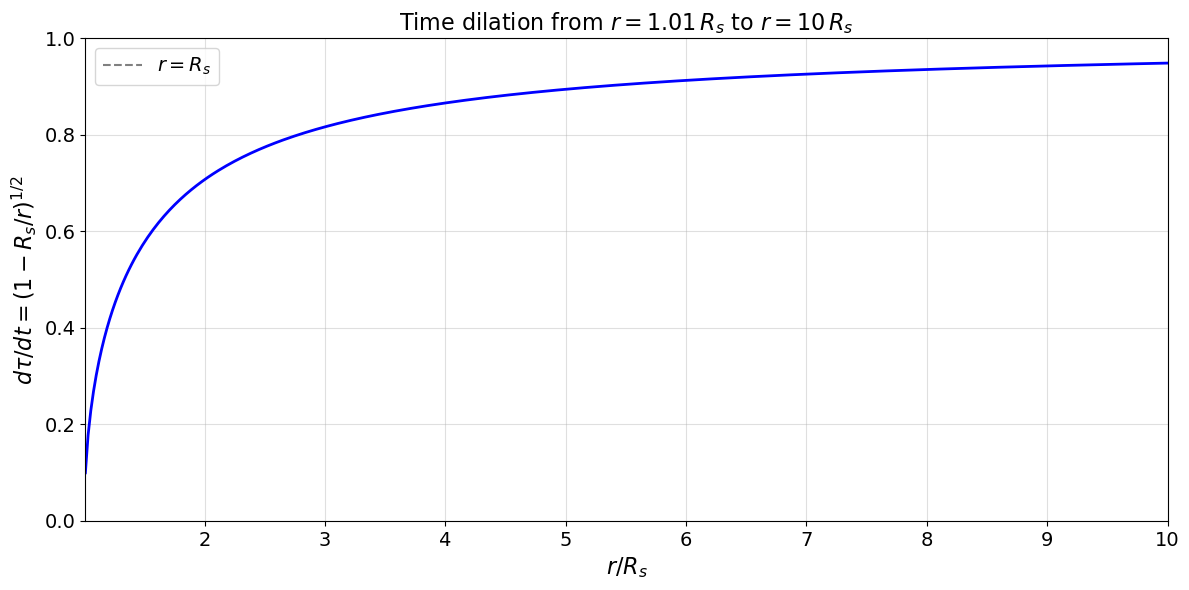

In [5]:
def time_dilation_factor(r, R_s):
    with np.errstate(invalid='ignore', divide='ignore'):
        x = np.asarray(r, dtype=float)
        out = np.sqrt(np.maximum(1 - R_s / x, 0))
    return np.where(x > R_s, out, 0.0)

r_over_Rs = np.linspace(1.01, 10, 400)
factor = np.sqrt(1 - 1/r_over_Rs)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(r_over_Rs, factor, 'b-', lw=2)
ax.axvline(1, color='gray', ls='--', label=r'$r = R_s$')
ax.set_xlabel(r'$r / R_s$', fontsize=16)
ax.set_ylabel(r'$d\tau/dt = (1 - R_s/r)^{1/2}$', fontsize=16)
ax.set_title('Time dilation from $r = 1.01\,R_s$ to $r = 10\,R_s$', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(1.01, 10)
ax.set_ylim(0, 1)
ax.legend(fontsize=14)
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


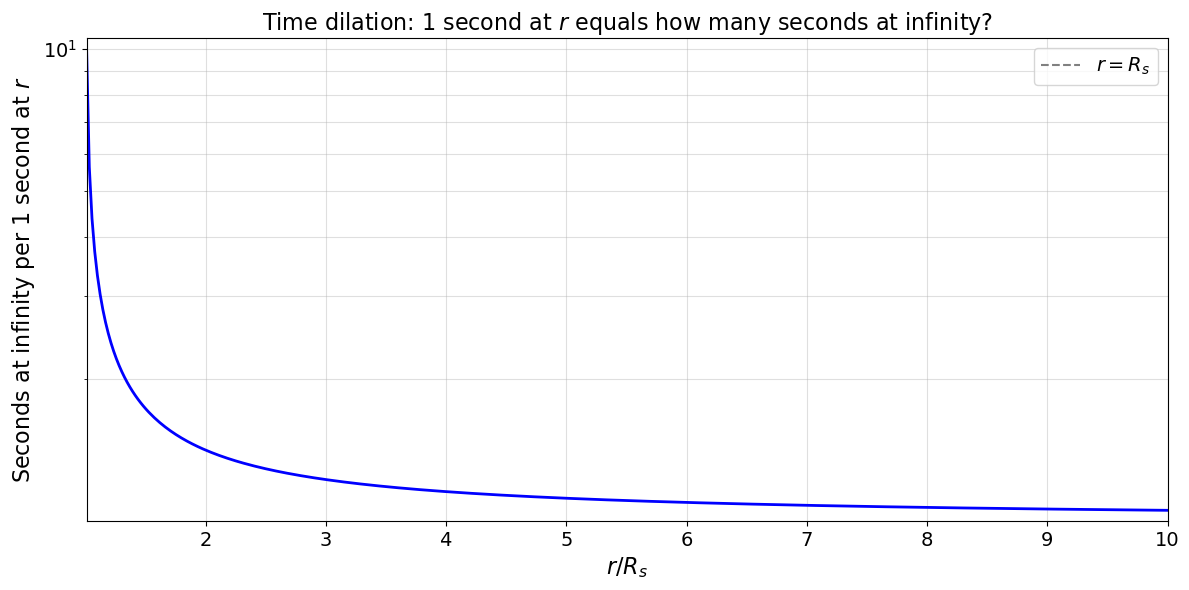

In [6]:
stretch = 1 / np.sqrt(1 - 1/r_over_Rs)
fig, ax = plt.subplots(figsize=(12, 6))
ax.semilogy(r_over_Rs, stretch, 'b-', lw=2)
ax.axvline(1, color='gray', ls='--', label=r'$r = R_s$')
ax.set_xlabel(r'$r / R_s$', fontsize=16)
ax.set_ylabel(r'Seconds at infinity per 1 second at $r$', fontsize=16)
ax.set_title('Time dilation: 1 second at $r$ equals how many seconds at infinity?', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(1.01, 10)
ax.set_ylim(stretch.min() * 0.95, stretch.max() * 1.05)
ax.legend(fontsize=14)
ax.grid(True, which='both', alpha=0.4)
plt.tight_layout()
plt.show()


In [7]:
M_earth = 5.972e24
R_earth_m = 6.371e6
R_s_earth = schwarzschild_radius_meters(M_earth)
R_s_sun = schwarzschild_radius_solar_masses(1)
R_sun_m = 6.96e8

dtau_dt_earth = np.sqrt(1 - R_s_earth / R_earth_m)
dtau_dt_sun = np.sqrt(1 - R_s_sun / R_sun_m)

print('Time dilation at surface (d tau / dt):')
print('  Earth:  {:.6e}'.format(dtau_dt_earth))
print('  Sun:    {:.6e}'.format(dtau_dt_sun))
print()
print('Seconds at infinity per 1 second at surface:')
print('  Earth:  {:.6e}'.format(1/dtau_dt_earth))
print('  Sun:    {:.6e}'.format(1/dtau_dt_sun))


Time dilation at surface (d tau / dt):
  Earth:  1.000000e+00
  Sun:    9.999979e-01

Seconds at infinity per 1 second at surface:
  Earth:  1.000000e+00
  Sun:    1.000002e+00
